In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("MultiJetRun2010B.csv")
df.columns = df.columns.str.strip()
target = "nJets"
features=["Run","Lumi","Event","MR","Rsq","E1","Px1","Py1","Pz1","E2","Px2","Py2","Pz2","MET","HT","nBJets"]
y = df.nJets
x = df[features]
x

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,MET,HT,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.89300,-54.03420,-58.9032,142.1790,70.02540,41.12250,-116.5130,18.31100,203.666,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.15000,6.88361,-12.9688,73.9025,-72.24720,11.88350,3.0899,14.77470,154.659,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.90200,102.64000,-101.9350,535.5510,-110.37900,-89.09290,-516.1790,25.22110,343.280,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.02400,-62.95350,-47.7434,112.8510,89.08430,3.45025,67.9007,46.02880,257.397,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.41000,-16.65900,-827.4980,445.6120,-91.19910,15.55830,-390.1440,8.11345,269.492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21721,149181,1804,1703614264,540.609,0.019221,333.8870,43.55990,-102.70100,114.4280,517.8890,-13.42100,51.57390,-503.3490,50.30450,393.455,0
21722,149181,1804,1703630424,336.015,0.028433,190.1890,-7.40921,135.39000,132.1900,152.3330,-6.69605,-130.51800,-76.1992,23.12280,266.282,0
21723,149181,1804,1703621104,484.392,0.000920,197.1530,-61.55070,21.76930,110.9250,483.9510,47.52920,-37.96000,-470.8470,3.71479,261.615,0
21724,149181,1804,1703642752,215.713,0.055836,647.4060,-78.95460,-88.75690,636.3600,383.0890,80.57020,49.37650,371.1240,20.95540,213.289,0


In [3]:
corr = df.corr()
corr["nJets"].sort_values()

Rsq      -0.121244
Px1      -0.008989
Pz1      -0.005358
Py2      -0.001366
Py1      -0.000909
Pz2       0.006130
Lumi      0.006149
Event     0.008315
Run       0.009275
Px2       0.010880
nBJets    0.035602
MET       0.089648
E1        0.152637
E2        0.189935
MR        0.310036
HT        0.484070
nJets     1.000000
Name: nJets, dtype: float64

<AxesSubplot: >

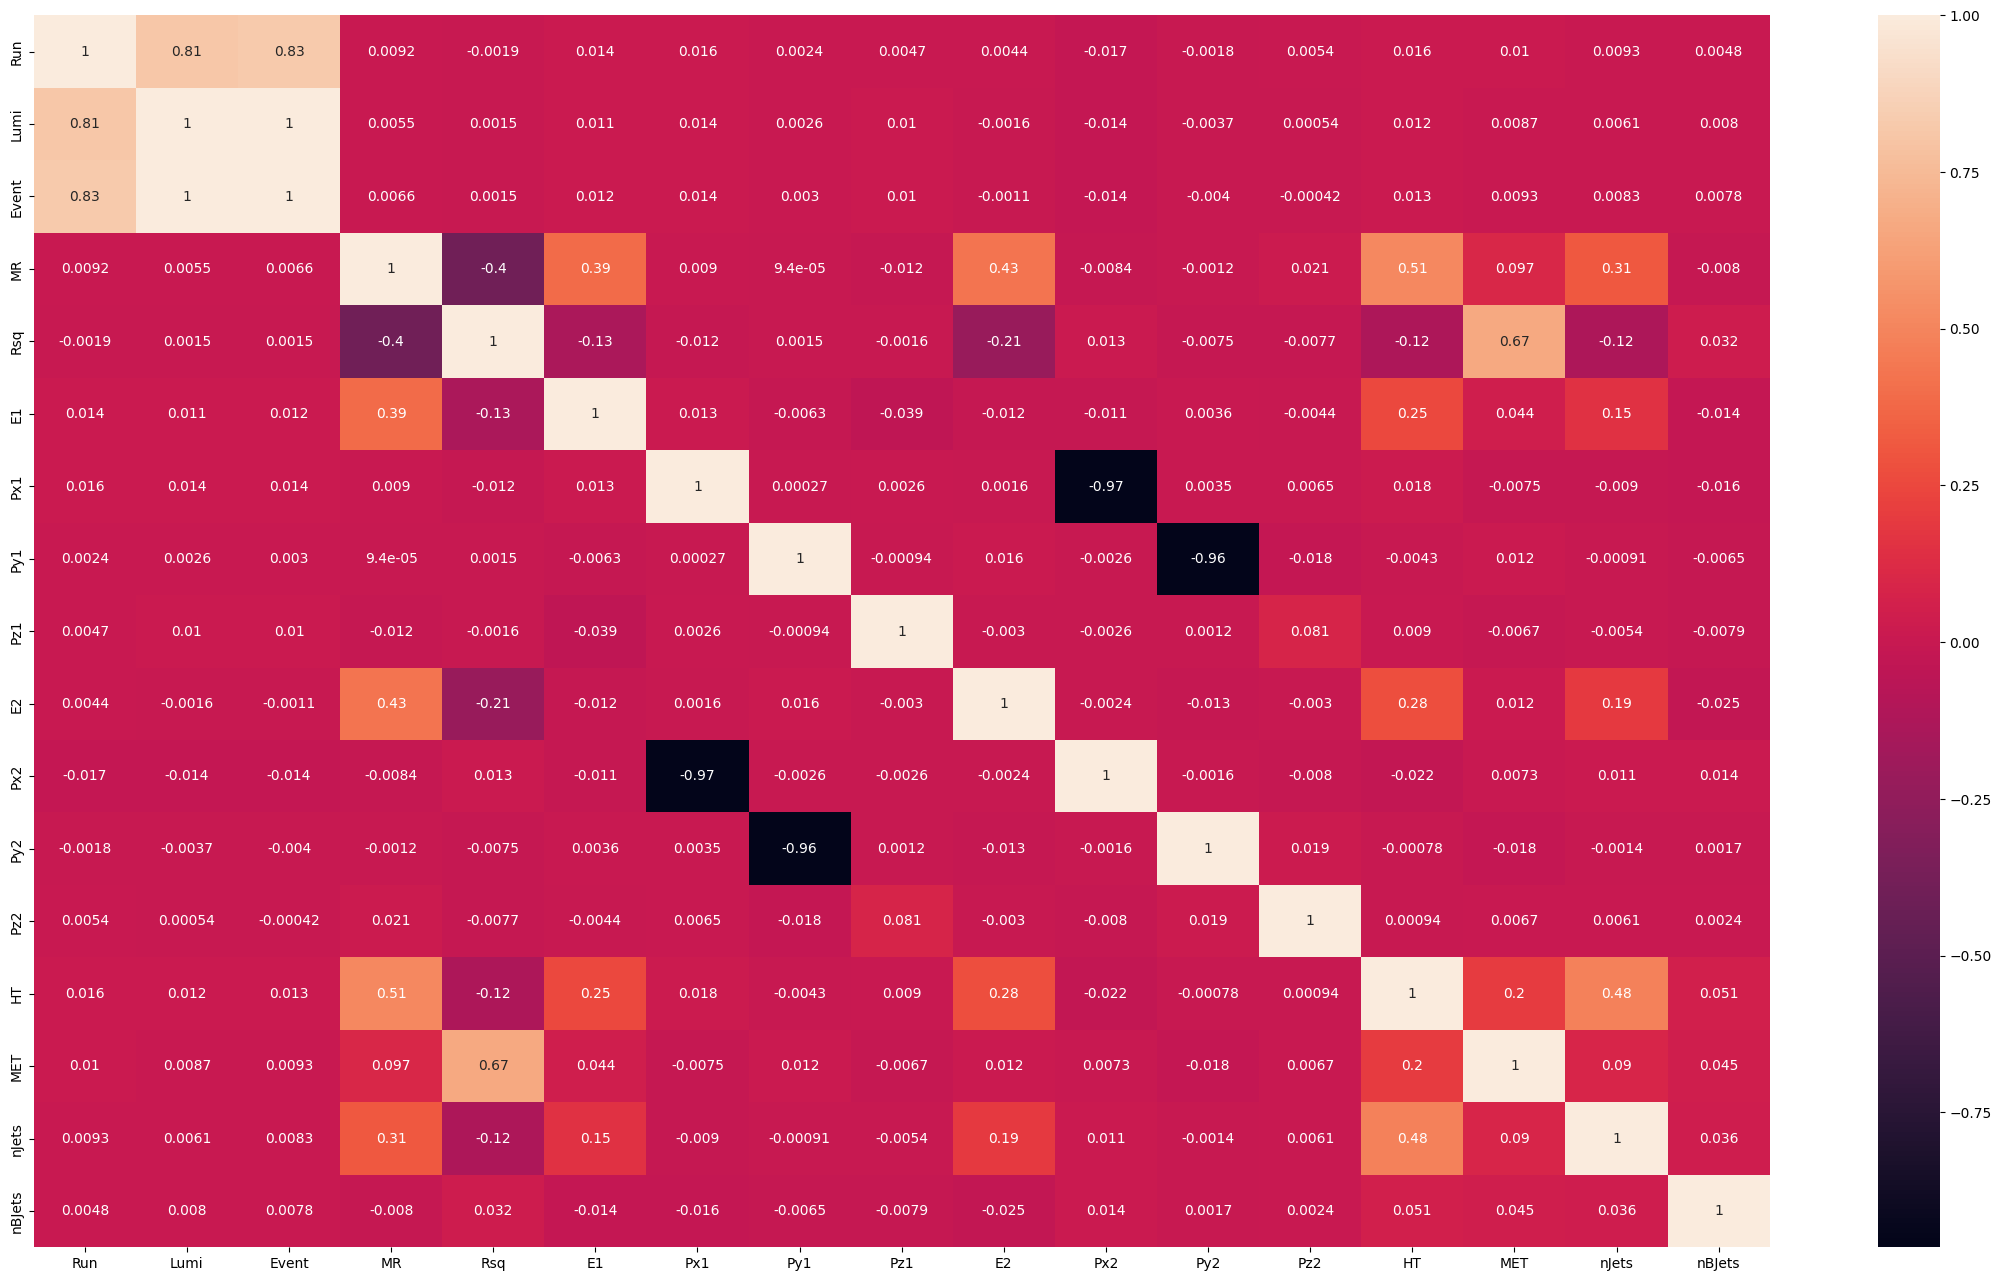

In [4]:
plt.figure(figsize=(28, 16))
sns.heatmap(df.corr(), annot=True)


C:\Users\yusuf\AppData\Local\Temp\ipykernel_7572\3722090176.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["Run", "MET", "Rsq", "Event", "Lumi", "nBJets"], "columns")


<AxesSubplot: >

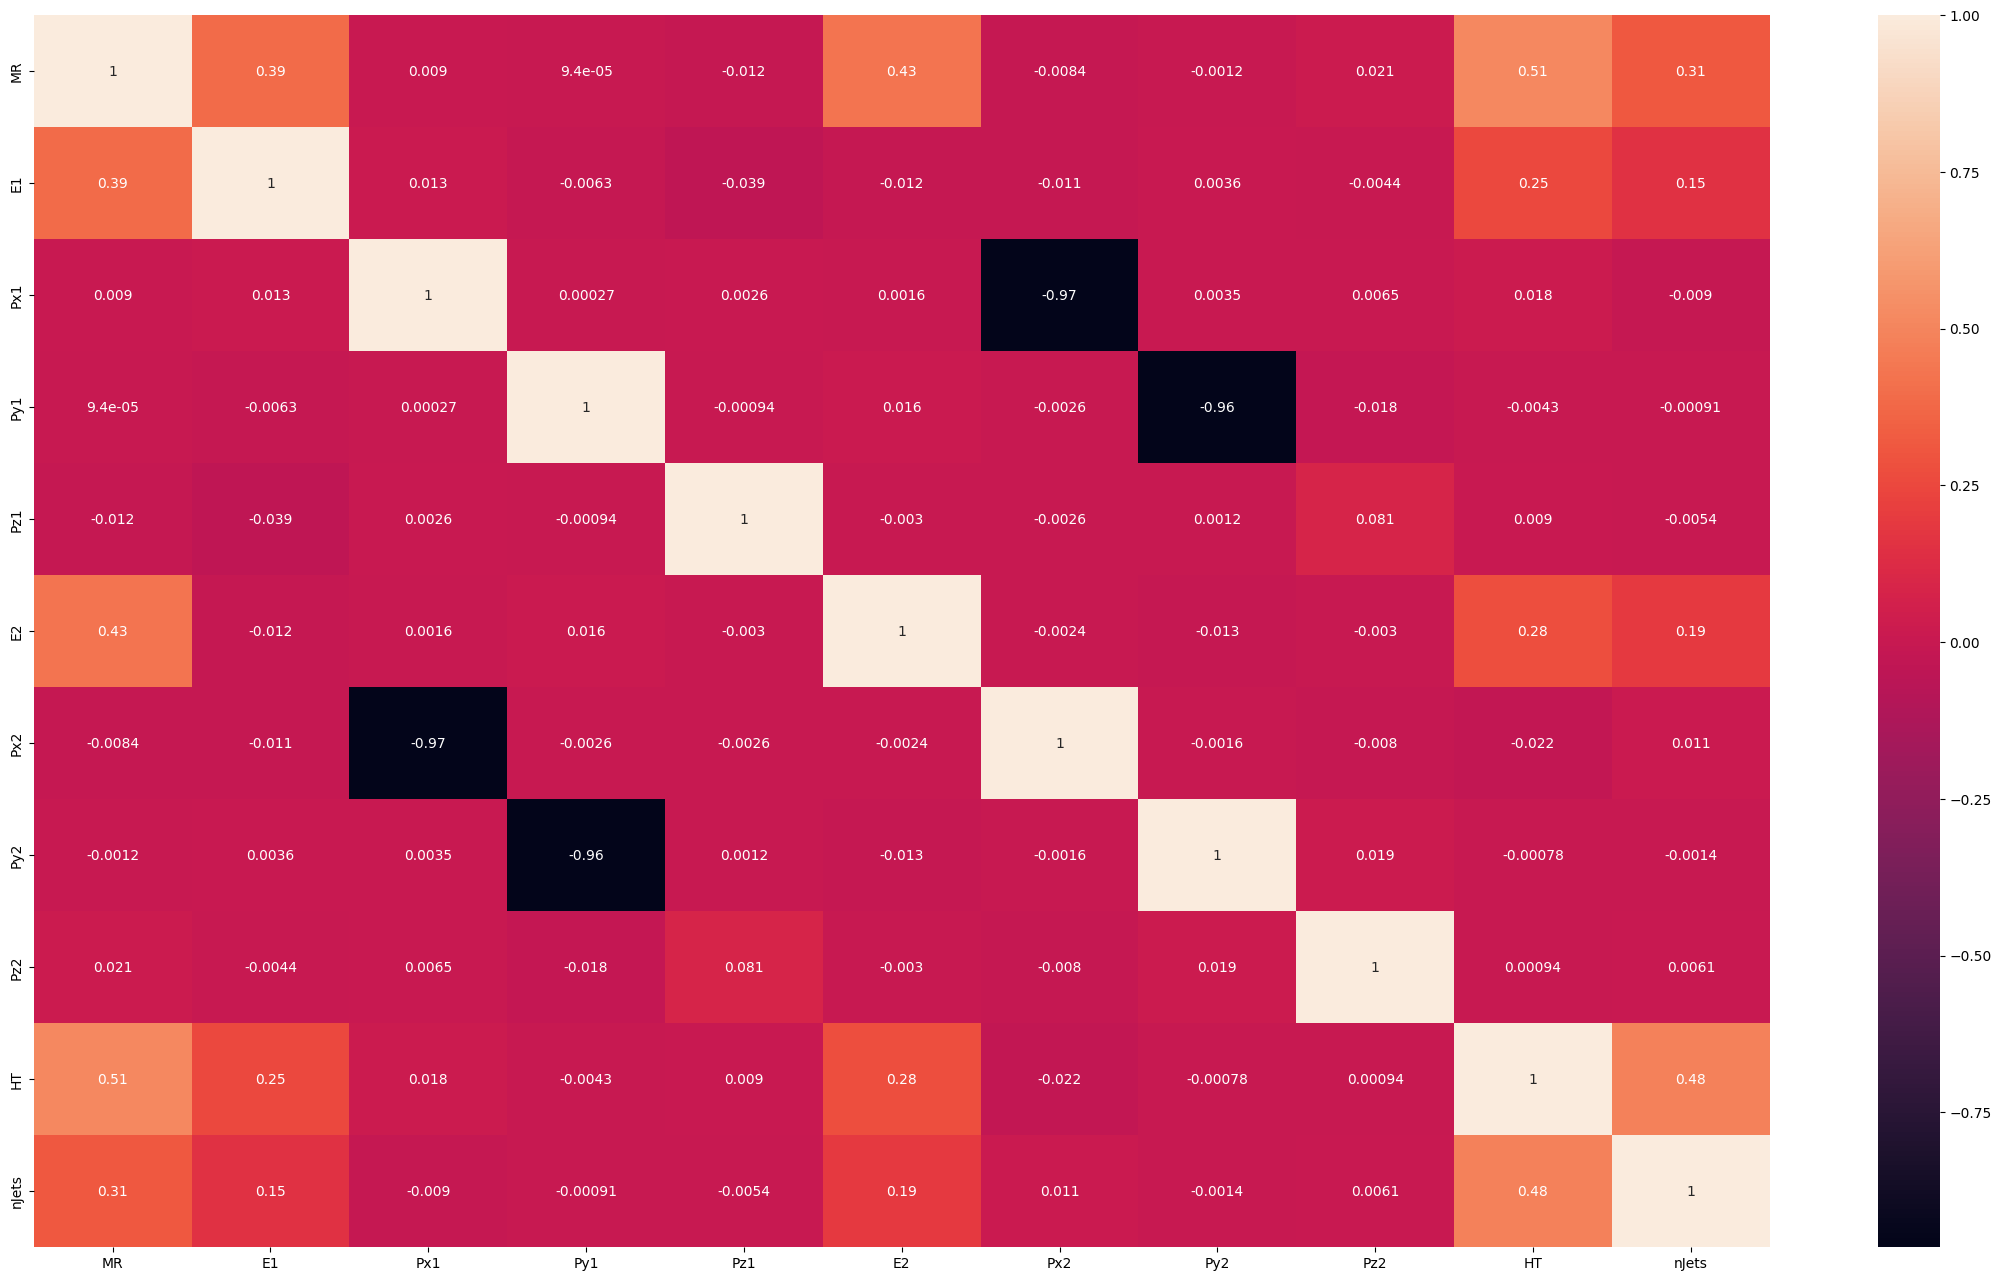

In [5]:
df = df.drop(["Run", "MET", "Rsq", "Event", "Lumi", "nBJets"], "columns")
plt.figure(figsize=(28, 16))
sns.heatmap(df.corr(), annot=True)

In [6]:
df.columns
features = ['MR', 'E1', 'Px1', 'Py1', 'Pz1', 'E2', 'Px2', 'Py2', 'Pz2', 'HT']
target = "nJets"
x = df[features]
y = df[target]

In [7]:
x["px12"] = x["Px1"] * x["Px2"] 
x["py12"] = x["Py1"] * x["Py2"]
x["pz12"] = x["Pz1"] * x["Pz2"]
x["total energy"] = x["E1"] + x["E2"]

In [8]:
x = x.drop(["Px1", "Px2", "Py1", "Py2","Py1", "Py2", "E1", "E2"],"columns" )
x = x.drop(["Pz1", "Pz2"], "columns")

C:\Users\yusuf\AppData\Local\Temp\ipykernel_7572\1899723117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(["Px1", "Px2", "Py1", "Py2","Py1", "Py2", "E1", "E2"],"columns" )
C:\Users\yusuf\AppData\Local\Temp\ipykernel_7572\1899723117.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(["Pz1", "Pz2"], "columns")


In [9]:
x.head()

,MR,HT,px12,py12,pz12,total energy
0,215.553,203.666,-7695.301282,-2222.021390,6862.988542,278.889
1,155.437,154.659,-5862.860280,81.801379,-40.072295,157.289
2,400.563,343.280,-15442.242858,-9144.495256,52616.706365,788.735
3,286.245,257.397,-13899.288823,-217.205313,-3241.810280,288.337
4,204.514,269.492,-9157.301631,-259.185720,322843.379712,1279.407


In [10]:
pd.get_dummies(y)

,2,3,4,5,6,7
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
21721,0,0,1,0,0,0
21722,1,0,0,0,0,0
21723,0,0,1,0,0,0
21724,1,0,0,0,0,0


In [11]:
y.value_counts()

2    14002
3     6204
4     1325
5      169
6       23
7        3
Name: nJets, dtype: int64

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MR            21726 non-null  float64
 1   HT            21726 non-null  float64
 2   px12          21726 non-null  float64
 3   py12          21726 non-null  float64
 4   pz12          21726 non-null  float64
 5   total energy  21726 non-null  float64
dtypes: float64(6)
memory usage: 1018.5 KB


In [13]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21726 entries, 0 to 21725
Series name: nJets
Non-Null Count  Dtype
--------------  -----
21726 non-null  int64
dtypes: int64(1)
memory usage: 169.9 KB


In [14]:
x["y_2"]= y
x.head()


,MR,HT,px12,py12,pz12,total energy,y_2
0,215.553,203.666,-7695.301282,-2222.021390,6862.988542,278.889,2
1,155.437,154.659,-5862.860280,81.801379,-40.072295,157.289,2
2,400.563,343.280,-15442.242858,-9144.495256,52616.706365,788.735,3
3,286.245,257.397,-13899.288823,-217.205313,-3241.810280,288.337,2
4,204.514,269.492,-9157.301631,-259.185720,322843.379712,1279.407,3


In [15]:
x["y_2"].value_counts()

2    14002
3     6204
4     1325
5      169
6       23
7        3
Name: y_2, dtype: int64

In [16]:
y = x["y_2"]
x = x.drop(["y_2"], "columns")

C:\Users\yusuf\AppData\Local\Temp\ipykernel_7572\3789780171.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop(["y_2"], "columns")


In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21726 entries, 0 to 21725
Series name: y_2
Non-Null Count  Dtype
--------------  -----
21726 non-null  int64
dtypes: int64(1)
memory usage: 169.9 KB


In [18]:
y_new = pd.get_dummies(y)
y_new.info

<bound method DataFrame.info of        2  3  4  5  6  7
0      1  0  0  0  0  0
1      1  0  0  0  0  0
2      0  1  0  0  0  0
3      1  0  0  0  0  0
4      0  1  0  0  0  0
...   .. .. .. .. .. ..
21721  0  0  1  0  0  0
21722  1  0  0  0  0  0
21723  0  0  1  0  0  0
21724  1  0  0  0  0  0
21725  0  0  1  0  0  0

[21726 rows x 6 columns]>

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [20]:
model_params = {
     
        'ridge': {
            'model': RidgeClassifierCV(),
            'params': {
                'alphas': [1,2],
            }
        },
        "xgbclassifier":
        {
            "model": XGBClassifier(),
            "params": 
            {
                'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6],
        'max_depth': [3, 4]
            }
        },
        "decisionTree":
        {
            "model": DecisionTreeClassifier(),
            "params":
            {

            }
        }
    }

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
y_train, y_test = pd.get_dummies(y_train), pd.get_dummies(y_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_2

,model,best_score,best_params
0,ridge,0.635716,{'alphas': 1}
1,xgbclassifier,0.739675,"{'colsample_bytree': 0.6, 'gamma': 1, 'max_dep..."
2,decisionTree,0.738141,{}


In [23]:
from sklearn.metrics import accuracy_score
y_hat = clf.best_estimator_.predict(x_test)
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_hat))

0.740979381443299


In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [27]:
from sklearn.metrics import accuracy_score
y_hat=rf_random.best_estimator_.predict(x_test)
print(accuracy_score(y_test, y_hat))

0.7789027982326951
